In [13]:

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 2: Load Dataset
data = pd.read_csv("train.csv")

In [5]:
# Step 3: Check column names
print("Columns:", data.columns.tolist())
data.head()

Columns: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [6]:
# Step 4: Convert 'date' to datetime safely
# Some files might have uppercase or extra spaces, so let's ensure correct column
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
else:
    # Try fixing column name if it's something like 'Date' or 'DATE'
    for col in data.columns:
        if col.lower() == 'date':
            data.rename(columns={col: 'date'}, inplace=True)
            data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [7]:
# Step 5: Basic Info and Missing Values
data.info()
print("\nMissing Values:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27509 entries, 0 to 27508
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           27509 non-null  int64         
 1   date         27508 non-null  datetime64[ns]
 2   store_nbr    27508 non-null  float64       
 3   family       27508 non-null  object        
 4   sales        27508 non-null  float64       
 5   onpromotion  27508 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.3+ MB

Missing Values:
 id             0
date           1
store_nbr      1
family         1
sales          1
onpromotion    1
dtype: int64


In [8]:
# Step 6: Descriptive Statistics
print("\nDescriptive Statistics:\n", data['sales'].describe())

mean_sales = data['sales'].mean()
median_sales = data['sales'].median()
mode_sales = data['sales'].mode()[0]

print(f"\nMean Sales: {mean_sales:.2f}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")



Descriptive Statistics:
 count    27508.000000
mean       192.067328
std        675.606573
min          0.000000
25%          0.000000
50%          0.000000
75%         71.000000
max      19849.000000
Name: sales, dtype: float64

Mean Sales: 192.07
Median Sales: 0.0
Mode Sales: 0.0


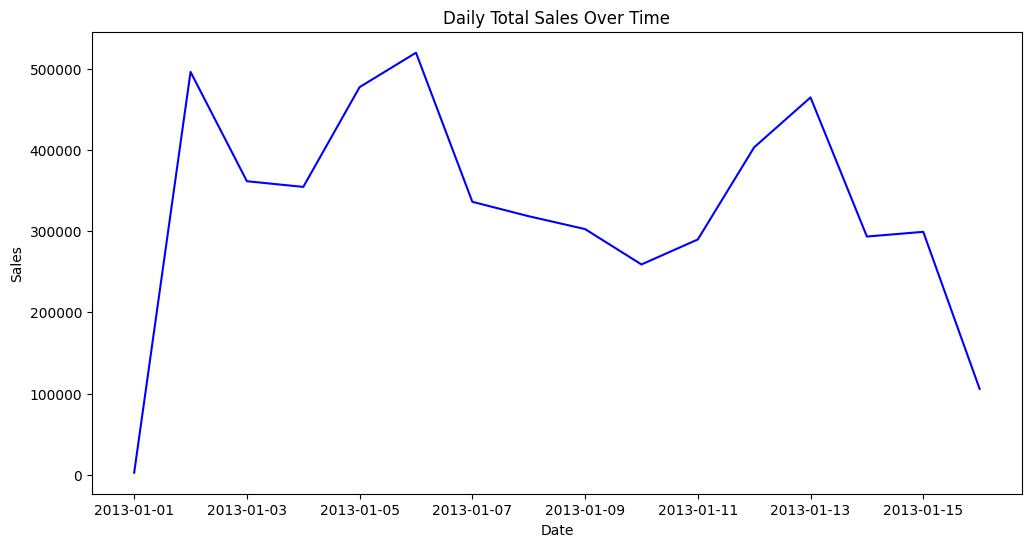

In [9]:
# Step 7: Daily Sales Trend
daily_sales = data.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_sales['date'], daily_sales['sales'], color='blue')
plt.title("Daily Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [10]:
# Step 8: Extract Month and Day safely
if pd.api.types.is_datetime64_any_dtype(data['date']):
    data['month'] = data['date'].dt.month
    data['day_of_week'] = data['date'].dt.day_name()
else:
    print("⚠️ Date column not converted properly.")


/tmp/ipython-input-4169218678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='sales', data=monthly_sales, palette="coolwarm")


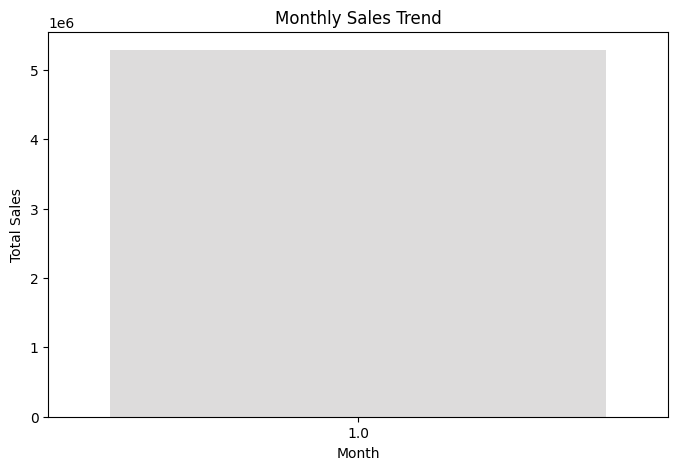

In [11]:
# Step 9: Monthly Trend
monthly_sales = data.groupby('month')['sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='month', y='sales', data=monthly_sales, palette="coolwarm")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


/tmp/ipython-input-4179417231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='sales', data=data, estimator=sum,


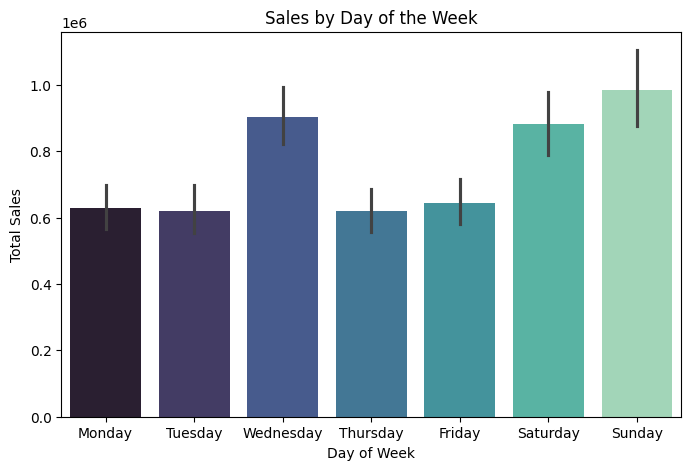

In [12]:
# Step 10: Weekly Trend
plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='sales', data=data, estimator=sum,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette="mako")
plt.title("Sales by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.show()


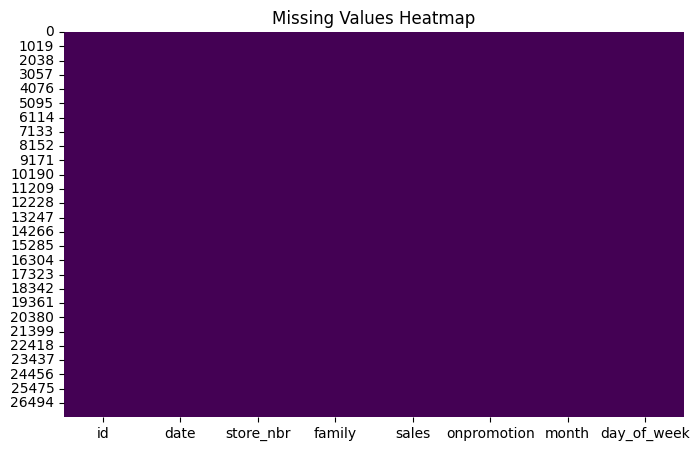

In [14]:
# Step 11: Missing Values Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
